#Pistachio classification
###Pistachio is a shelled fruit from the anacardiaceae family. The homeland of pistachio is the Middle East. The Kirmizi pistachios and Siirt pistachios are the major types grown and exported in Turkey. Since the prices, tastes, and nutritional values of these types differs, the type of pistachio becomes important when it comes to trade.
###Your goal is to identify these two types of pistachios, which are frequently grown in Turkey, by classifying them via convolutional neural networks.
###Data collection: Kirmizi and Siirt pistachio types were obtained through the computer vision system. The pre-trained dataset includes a total of 2148 images, 1232 of Kirmizi type and 916 of Siirt type.

1. Importing the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# preprocessing
#  1. resizing
#  2. flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# to flatten an array - a.flatten() where a is a numpy arrayy
target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Computer_vision_projects/Pistachio_classification'
CATEGORIES = ['Kirmizi_Pistachio', 'Siirt_Pistachio']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape)
  #   plt.imshow(img_array)
  #   break
  # break
    img_resized = resize(img_array, (224,224,3))  # normalizing the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [4]:
flat_data.shape

(2002, 150528)

In [5]:
import pandas as pd
flat_data = pd.DataFrame(flat_data)

In [6]:
flat_data.columns

RangeIndex(start=0, stop=150528, step=1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = ['Kirmizi', 'Shiirt']
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  plot_confusion_matrix(confusion_matrix(y_train_pred, y_train))
  print('--------------------------------------------------------------')
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))
  plot_confusion_matrix(confusion_matrix(y_test_pred, y_test))
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')

In [9]:
# Check for columns with all zeros
zero_columns = flat_data.columns[(flat_data == 0).all()]

# Drop columns with all zeros
flat_data = flat_data.drop(zero_columns, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

In [11]:
flat_data.shape

(2002, 94585)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


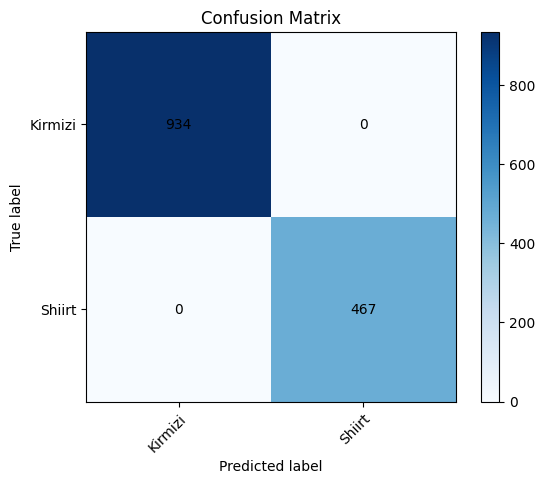

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       400
           1       0.83      0.84      0.84       201

    accuracy                           0.89       601
   macro avg       0.88      0.88      0.88       601
weighted avg       0.89      0.89      0.89       601

[[366  34]
 [ 32 169]]


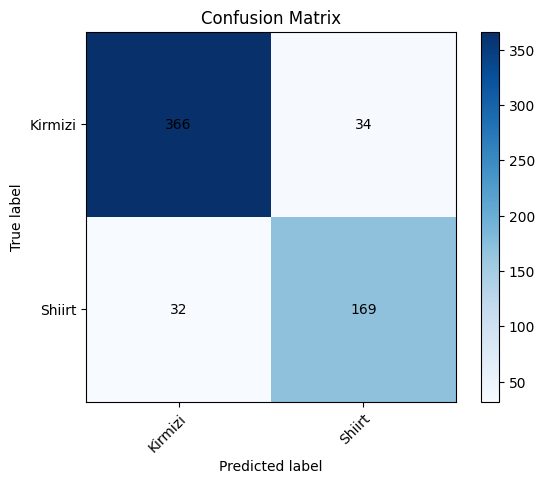

--------------------------------------------------------------
--------------------------------------------------------------
None


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

In [34]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8901830282861897
Precision: 0.8407960199004975
Recall: 0.8325123152709359
F1 Score: 0.8366336633663367


# Decision Tree Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


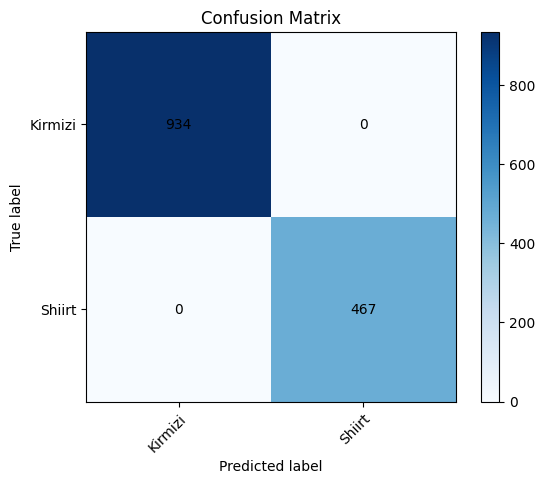

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       384
           1       0.84      0.79      0.81       217

    accuracy                           0.87       601
   macro avg       0.86      0.85      0.86       601
weighted avg       0.87      0.87      0.87       601

[[352  32]
 [ 46 171]]


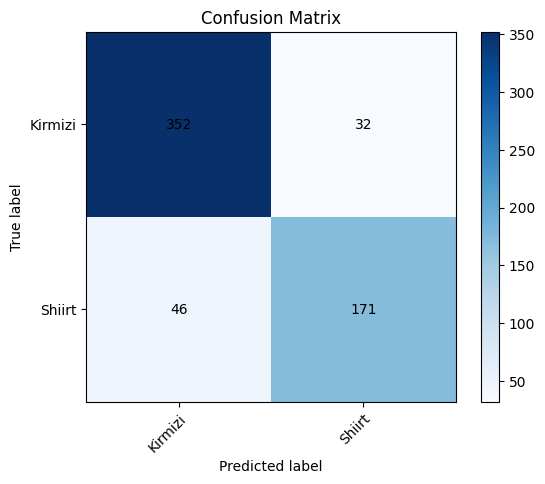

--------------------------------------------------------------
--------------------------------------------------------------
None


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#Random Forest Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       938
           1       0.99      1.00      1.00       463

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   4]
 [  0 463]]


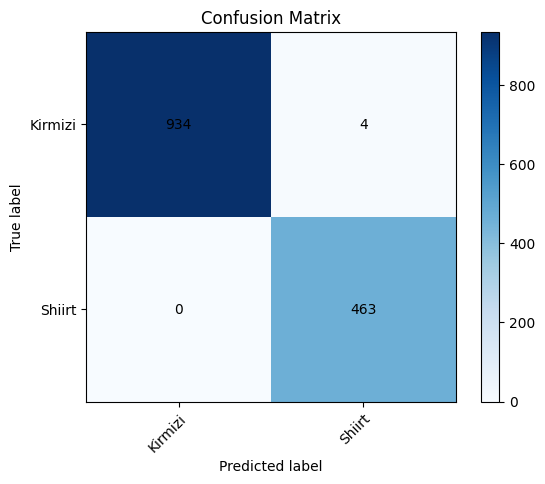

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       398
           1       0.86      0.86      0.86       203

    accuracy                           0.91       601
   macro avg       0.90      0.90      0.90       601
weighted avg       0.91      0.91      0.91       601

[[370  28]
 [ 28 175]]


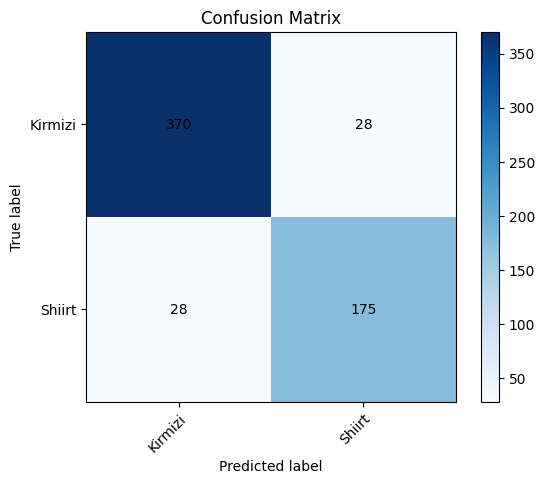

--------------------------------------------------------------
--------------------------------------------------------------
None


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

# Naive Bayes

Accuracy: 0.7454242928452579
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1139
           1       0.44      0.78      0.56       262

    accuracy                           0.77      1401
   macro avg       0.69      0.78      0.70      1401
weighted avg       0.85      0.77      0.79      1401

[[877 262]
 [ 57 205]]


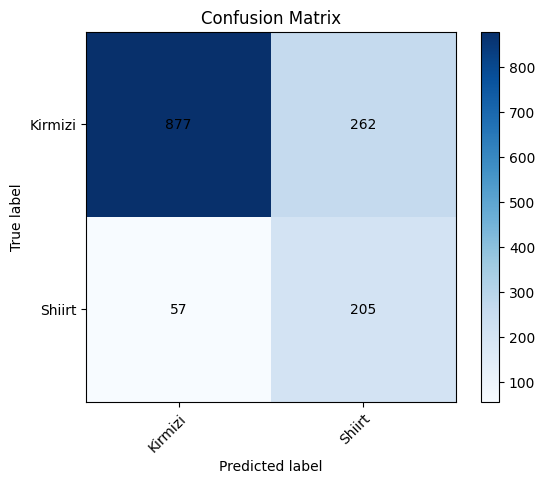

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       471
           1       0.44      0.69      0.54       130

    accuracy                           0.75       601
   macro avg       0.67      0.73      0.68       601
weighted avg       0.80      0.75      0.76       601

[[358 113]
 [ 40  90]]


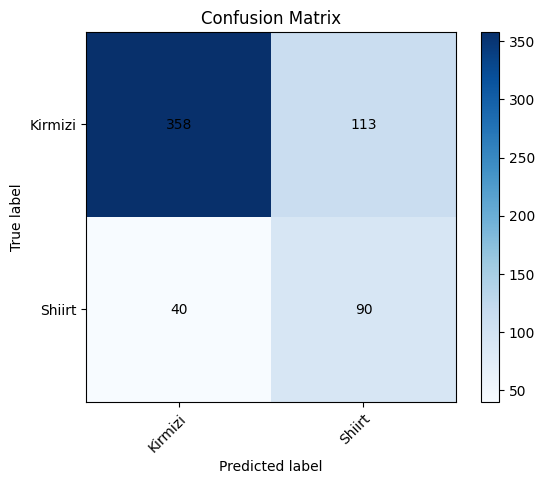

--------------------------------------------------------------
--------------------------------------------------------------
None


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#KNN

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       883
           1       0.92      0.83      0.87       518

    accuracy                           0.91      1401
   macro avg       0.91      0.89      0.90      1401
weighted avg       0.91      0.91      0.91      1401

[[846  37]
 [ 88 430]]


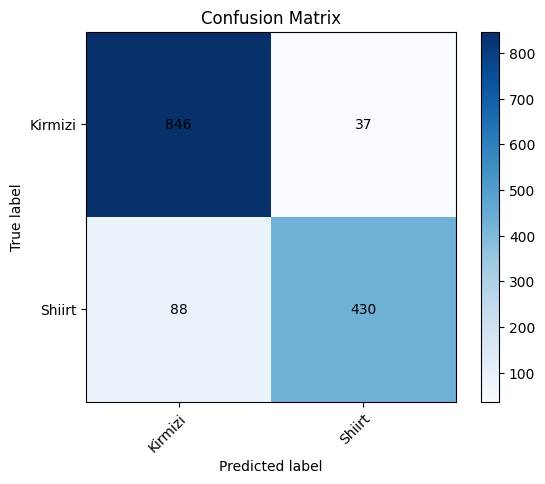

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       367
           1       0.88      0.76      0.82       234

    accuracy                           0.87       601
   macro avg       0.87      0.85      0.86       601
weighted avg       0.87      0.87      0.87       601

[[343  24]
 [ 55 179]]


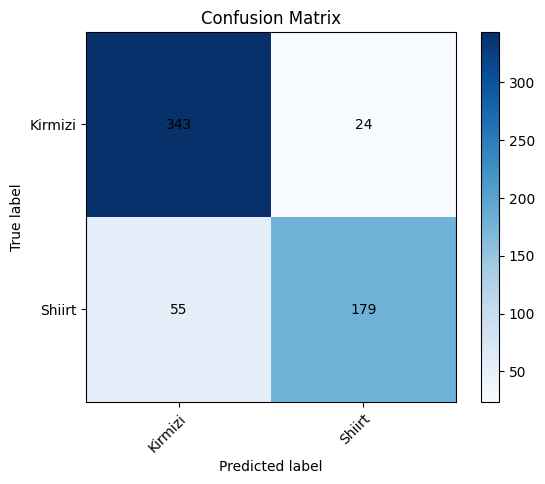

--------------------------------------------------------------
--------------------------------------------------------------
None


In [20]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#Adaboost

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       937
           1       0.99      0.99      0.99       464

    accuracy                           0.99      1401
   macro avg       0.99      0.99      0.99      1401
weighted avg       0.99      0.99      0.99      1401

[[931   6]
 [  3 461]]


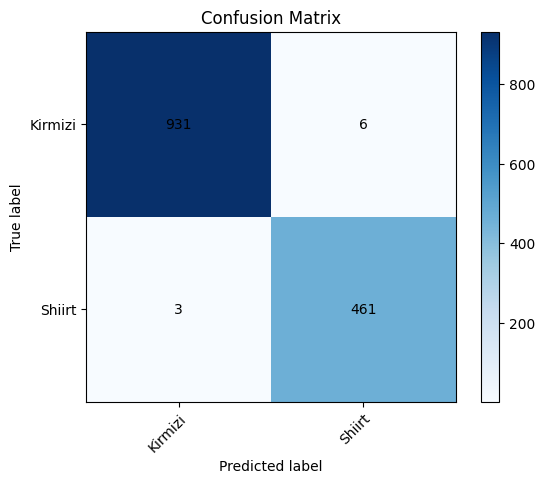

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       384
           1       0.90      0.84      0.87       217

    accuracy                           0.91       601
   macro avg       0.90      0.89      0.90       601
weighted avg       0.91      0.91      0.91       601

[[363  21]
 [ 35 182]]


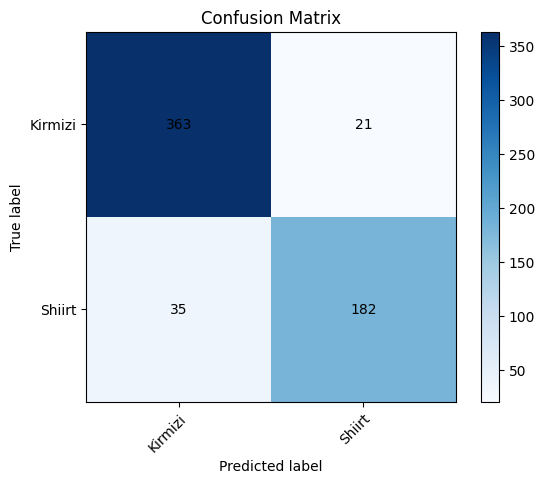

--------------------------------------------------------------
--------------------------------------------------------------
None


In [23]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier
classifier = AdaBoostClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


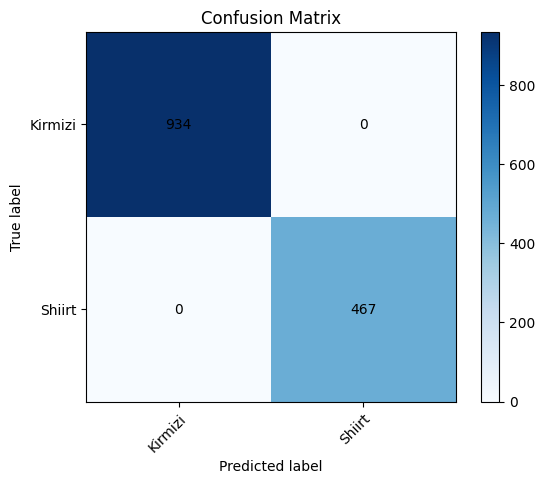

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       389
           1       0.89      0.85      0.87       212

    accuracy                           0.91       601
   macro avg       0.90      0.89      0.90       601
weighted avg       0.91      0.91      0.91       601

[[366  23]
 [ 32 180]]


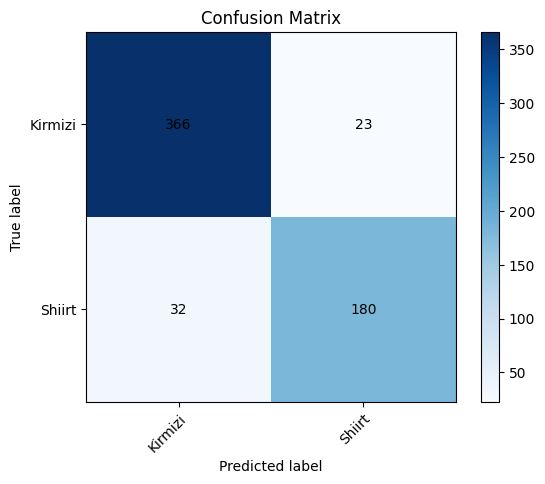

--------------------------------------------------------------
--------------------------------------------------------------
None


In [25]:
from sklearn import svm

svc = svm.SVC(probability = True, kernel = 'linear', gamma = 0.001)
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

In [35]:
X_train.shape

(1401, 94585)

In [26]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [27]:
!pip install dbn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [29]:
!git clone https://github.com/albertbup/deep-belief-network.git

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 798 (delta 13), reused 20 (delta 9), pack-reused 763
Receiving objects: 100% (798/798), 183.45 KiB | 3.67 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [30]:
!cd deep-belief-network

In [31]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from dbn.tensorflow import SupervisedDBNClassification

# Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prepare the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

# Convert the labels to binary (0 or 1)
# y_train_binary = np.where(y_train < 5, 0, 1)
# y_test_binary = np.where(y_test < 5, 0, 1)

# # Define the Deep Belief Network architecture
# dbn = Sequential()
# dbn.add(Dense(512, activation='relu', input_shape=(386861,)))
# dbn.add(Dense(256, activation='relu'))
# dbn.add(Dense(128, activation='relu'))
# dbn.add(Dense(1, activation='sigmoid'))

clasifier = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.1, n_epochs_rbm=10, n_iter_backprop=100, batch_size=32, activation_function='relu', dropout_p=0.2)
clasifier.fit(X_train, y_train)
y_pred = clasifier.predict(X_test)
# print('nAccuracy of Prediction: %f' % accuracy_score(C_test, y_pred))
# Compile the model
clasifier.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the Deep Belief Network
clasifier.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = clasifier.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

ModuleNotFoundError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
# from dbn.tensorflow import SupervisedDBNClassification

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

# # Define the Deep Belief Network architecture
clasifier = Sequential()
clasifier.add(Dense(2048, activation='sigmoid', input_shape=(94585,)))
clasifier.add(Dense(1024, activation='sigmoid'))
clasifier.add(Dense(248, activation='sigmoid'))
clasifier.add(Dense(32, activation = 'sigmoid'))
clasifier.add(Dense(1, activation='sigmoid'))

# clasifier = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.1, n_epochs_rbm=10, n_iter_backprop=100, batch_size=32, activation_function='relu', dropout_p=0.2)
# clasifier.fit(X_train, y_train)
# y_pred = clasifier.predict(X_test)
# print('nAccuracy of Prediction: %f' % accuracy_score(C_test, y_pred))
# Compile the model
clasifier.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the Deep Belief Network
clasifier.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = clasifier.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)